<a href="https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/preprocessing_and_decomposition/Wavelet_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

In the context of wavelets, denoising means reducing the noise as much as possible without distorting the signal. Denoising makes use of the time-frequency-amplitude matrix created by the wavelet transform. It's based on the assumption that the undesired noise will be separated from the desired signal by their frequency ranges. Most commonly in scientific measurements, the desired signal components are located at relatively low frequencies and the noise is mostly at high frequencies. The process is controlled both by the selection of wavelet type and by a positive integer number called the wavelet level; the higher the level, the lower is the frequency divider between signal and noise. (To that extent, the wavelet level is similar to the effect of the smooth width of a smoothing operation).

## Code Example

In [ ]:
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt


In [ ]:
## example data importing
data = pd.read_csv('https://raw.githubusercontent.com/iotanalytics/IoTTutorial/main/data/SCG_data.csv').drop('Unnamed: 0',1).to_numpy()[0:20,:1000]

In [ ]:
def wdenoise(data, method, threshold):
    # Create wavelet object and define parameters
    w = pywt.Wavelet(method)
    maxlev = pywt.dwt_max_level(len(data), w.dec_len)
    # maxlev = 2 # Override if desired
    print("maximum level is " + str(maxlev))
    # Decompose into wavelet components, to the level selected:
    coeffs = pywt.wavedec(data, method, level=maxlev)  
    #cA = 0.0
    #cA = pywt.threshold(cA, threshold*max(cA))
    # plt.figure()
    for i in range(1, len(coeffs)):
        # plt.subplot(maxlev, 1, i)
        # plt.plot(coeffs[i])
        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))
        # plt.plot(coeffs[i])
    datarec = pywt.waverec(coeffs, method)
    return datarec

In [ ]:
data_rec = wdenoise(data[10,:], 'sym4',0.5)

maximum level is 7


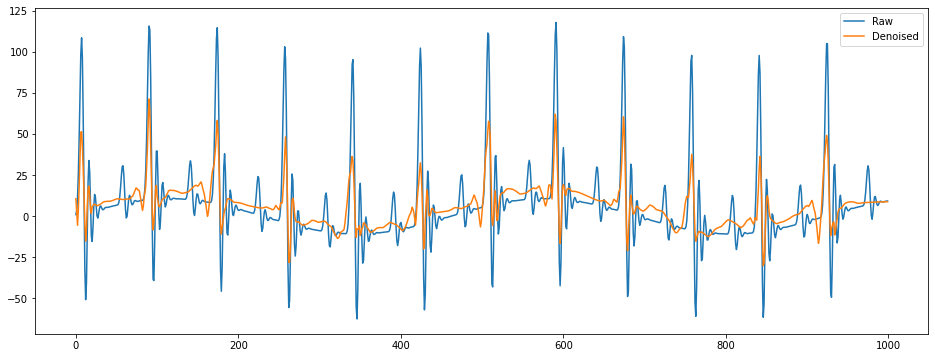

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(data[10,:],label='Raw')
plt.plot(data_rec,label='Denoised')
plt.legend()

## Discussion
Wavelet denoising relies on the wavelet representation of the Signal. Gaussian noise tends to be represented by small values in the wavelet domain and can be removed by setting coefficients below a given threshold to zero (hard thresholding) or shrinking all coefficients toward zero by a given amount (soft thresholding).

Pros:


Computational efficient， complexity O(N).

Result is good representation of original signal.

Cons:

Need to pre-determine parameter of thereshold.

Have gibbs effect when input signal has break point.

